In [1]:
import single_neuron_scratch_functions as h
import numpy as np

$$ \boldsymbol{X} = \begin{bmatrix} \boldsymbol x^1 & \boldsymbol{x}^2  & \dots & \boldsymbol x^m \end{bmatrix} $$
$$ where \qquad \boldsymbol x^i = \begin{bmatrix}
f_1 \\ f_2 \\ f_3  \\ \vdots  \\ f_d 
\end{bmatrix},\quad i=1 \enspace to \enspace m $$
So $\boldsymbol x^i$ $\rightarrow$ shape=(d,1) 
and $\boldsymbol X$ $\rightarrow$ shape=(d,m)
$$ \boldsymbol{Y} = \begin{bmatrix} y^1 & y^2  & \dots & y^m \end{bmatrix} \\ where \qquad y^i \enspace is \enspace 0 \enspace or \enspace 1 $$
So $\boldsymbol Y$ $\rightarrow$ shape=(1,m) 

**Data used**:
       
<table style="width:50%">
  <tr>
    <td>m (# of samples)</td>
    <td> 500 </td> 
  </tr>
  <tr>
    <td>d (# of features)</td>
    <td> 2 </td> 
  </tr>
  <tr>
    <td> shape of X </td>
    <td> (d,m)=(2, 500) </td> 
  </tr>
  <tr>
    <td>shape of Y </td>
    <td>(1,m)=(1, 500) </td> 
  </tr>
  
</table>

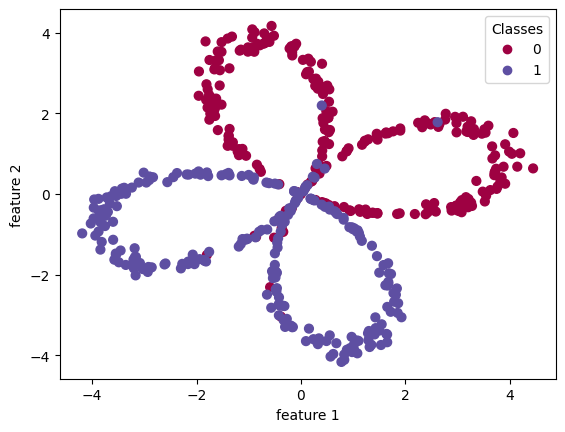

In [2]:
X, Y = h.load_flower_dataset(num_samples=500, petals=2, angle=30)
h.plot_scatter(X, Y)

**Initialize parameters($\boldsymbol \omega$ and $b$) with zeros**
$$ \boldsymbol \omega = \begin{bmatrix} w_1 \\ w_2 \\ w_3  \\ \vdots  \\ w_d \end{bmatrix},\quad b $$
So $\boldsymbol \omega$ $\rightarrow$ shape=(d,1) 

**Epoch**
<br>
$ 
\text{for} \quad  i=1 \enspace to \enspace m:
$
<br>
$ \qquad \qquad
\begin{rcases}
z^i = \boldsymbol{\omega}^T . \boldsymbol{x}^i \\
\displaystyle a^i = \frac{1}{1+e^{-z}} \qquad \qquad
\end{rcases} 
\color{green} \text{forward propagation}
$
<br>
$ \qquad \qquad
\mathcal{J}= \mathcal{J}+ [\ - \{ y^i\ ln(a^i)+(1-y^i)\ ln(1-a^i) \} \ ] \qquad \color{green} \text{cost function}
$
<br>
$ \qquad \qquad
\begin{rcases}
dz^i = a^i-y^i \\
\boldsymbol{d\omega}  = \boldsymbol{d\omega} +\boldsymbol{x}^i dz^i \\
db = db+dz^i \qquad \qquad
\end{rcases}
\color{green} \text{gradient descent}
$
<br>
$  
\begin{rcases}
\mathcal{J}=\mathcal{J}/m \\
\boldsymbol{d\omega}= \boldsymbol{d\omega}/m \\
db=db/m \qquad \qquad 
\end{rcases}
\color{green} \text{Averaging cost and gradients}
$
<br>
$ 
\begin{rcases}
\boldsymbol{\omega} = \boldsymbol{\omega}-\alpha \ \boldsymbol{d\omega} \\
b = b - \alpha \ db \qquad \qquad
\end{rcases}
\color{green} \text{Update Parameters after epoch}
$

In [3]:
def epoch(X, Y, w, b, learning_rate=0.005):
    '''
    Perform one epoch(cycle) of training for NEURON[logistic regression]
    
    Parameters
    ----------
    X : numpy.ndarray [shape: (#features, #samples)]
        matrix of data
    Y : numpy.ndarray [shape: (1, #samples)]
        array containing true labels 0 or 1
    w : numpy.ndarray [shape: (#features, 1)]
        array containing weights used by neuron
    b : float
        bias used by neuron
    learning_rate : float (default=0.05)   

    Returns
    -------
    w : updated array of learned weights by neuron
    b : updated learned bias by neuron
    dw : array containing increments that were added to weights (same shape as w)
    db : increment that was added to bias (same shape as b)
    cost: average loss of samples with input parameters
    '''    
    m = X.shape[1]
    dw = np.zeros((X.shape[0],1))
    db = 0
    cost=0
    for i in range(m):
        # FORWARD PROPAGATION
        z = np.dot(w.reshape(-1,),X[:,i]) + b # scalar/shape() --> (d,).(d,)
        # z = np.matmul(w.T,X[:,i])+b # shape(1,) --> (1,d)X(d,)
        # z = z.squeeze()  # shape(1,) to shape()/scalar i.e. [0.0] to 0.0
        A = 1/(1+np.exp(-z))

        # BACKWARD PROPAGATION (ADDING COST FUNCTION)
        cost = cost + (-( Y[0,i]*np.log(A)+(1-Y[0,i])*np.log(1-A)))
        # BACKWARD PROPAGATION (ADDING GRADS)
        dz = A-Y[0,i]
        dw = dw + X[:,i].reshape(-1,1)*dz  # slicing make X[:,1] shape as (2,), need to convert as (2,1) so can add dw
        db = db + dz

    # BACKWARD PROPAGATION (FINDING MEAN)
    cost = 1/m*cost
    dw = 1/m*dw
    db = 1/m*db

    # UPDATE PARAMETERS
    w = w - learning_rate*dw
    b = b- learning_rate*db
    
    return w, b, dw, db, cost

epoch is repeated many times so that overall cost of samples minimize and well-learned parameters(w and b) are obtained. 
<br>After number of epochs, learned parameters are used to predict classes/labels. Prediction is simply forward propagation of neuron as labeled in algorithm above and then if value is grater than 0.5 then 1 label is assigned else 0. 
<br>Finally, accuracy is computed by comparing predicted with true labels/classes.

In [4]:
## initialize parameters with zeros
w = np.zeros((X.shape[0],1))
b = 0.0

## epochs loop
num_epochs = 100
costs = []
for i in range(num_epochs):
    # Cost and gradient calculation 
    w, b, dw, db, cost = epoch(X, Y, w, b, learning_rate=0.005)   
    
    # Record the costs for every 10 epochs
    if i % 10 == 0 or i == num_epochs-1:
        costs.append(cost)
        print(f"Cost after epochs {i+1}, {cost}")

## Predict train set examples
Y_prediction_train = h.predict(w,b,X)

# Print train/test Errors
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y)) * 100))

Cost after epochs 1, 0.6931471805599468
Cost after epochs 11, 0.6628669151452956
Cost after epochs 21, 0.6354119840297352
Cost after epochs 31, 0.6105014205100375
Cost after epochs 41, 0.5878750034568575
Cost after epochs 51, 0.5672947339662046
Cost after epochs 61, 0.5485450549739767
Cost after epochs 71, 0.5314321930175592
Cost after epochs 81, 0.5157829346621401
Cost after epochs 91, 0.5014430789323403
Cost after epochs 100, 0.4895432835605481
train accuracy: 94.8 %


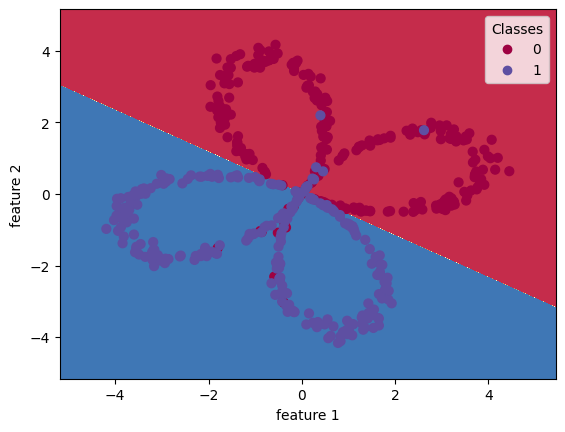

In [5]:
h.plot_decision_boundary(w, b, X, Y)